In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import time

from src.model import *

In [2]:
SPECTRA_DIR = 'Bruker_HTSXT/*' #FT-IR

AFSIS_PATH = Path('afsis/2009-2013/Dry_Chemistry/ICRAF/')

spectra_df = load_spectra_df(SPECTRA_DIR, AFSIS_PATH)

In [3]:
wet_chem_df = pd.read_csv('afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv')
wet_chem_df.head()

,SSN,Public,EC,ExAc,ExBas,M3 Al,M3 B,M3 Ca,M3 Cu,M3 Fe,M3 K,M3 Mg,M3 Mn,M3 Na,M3 P,M3 S,M3 Zn,PH,PSI
0,icr006475,True,0.053,2.56,2.744241,1095.0,0.3337,207.1,1.3150,153.70,306.30,89.5,9.266,42.71,4.495,18.960,2.825,4.682,67.052495
1,icr006586,True,0.193,0.59,16.797753,1165.0,0.7899,1665.0,2.8140,126.80,1186.00,636.7,254.700,40.83,12.510,13.600,1.952,7.062,30.420552
2,icr007929,True,0.305,0.19,16.503619,727.6,0.6142,2518.0,0.2496,260.40,72.57,428.5,35.820,42.94,21.090,14.810,2.742,7.114,60.506163
3,icr008008,True,0.053,0.48,6.302775,1458.0,0.3603,734.3,1.3690,134.10,274.60,222.5,29.110,20.73,109.200,11.400,0.980,5.650,51.470143
4,icr010198,True,0.032,1.05,2.390303,2166.0,0.0100,261.8,1.6860,97.49,91.76,76.5,375.200,49.31,3.958,5.281,1.258,5.501,247.626533


In [4]:
wet_chem_df.columns

Index(['SSN', 'Public', 'EC', 'ExAc', 'ExBas', 'M3 Al', 'M3 B', 'M3 Ca',
       'M3 Cu', 'M3 Fe', 'M3 K', 'M3 Mg', 'M3 Mn', 'M3 Na', 'M3 P', 'M3 S',
       'M3 Zn', 'PH', 'PSI'],
      dtype='object')

In [5]:
WET_CHEM_PATH = 'afsis/2009-2013/Wet_Chemistry/CROPNUTS/Wet_Chemistry_CROPNUTS.csv'
elements = ['EC', 'M3 Ca', 'M3 K', 'M3 Mg', 'M3 P', 'PH' ]
columns_to_load = elements + ['SSN']


wet_chem_df = pd.read_csv(WET_CHEM_PATH, index_col='SSN', usecols=columns_to_load)

In [6]:
data_df = spectra_df.merge(wet_chem_df, left_index=True, right_index=True)


In [7]:
contains_nan = data_df.isnull().values.sum()
contains_nan

639

In [8]:
data_df = data_df.dropna()

In [9]:
data_df

,7498.059,7496.131,7494.202,7492.274,7490.345,7488.417,7486.488,7484.560,7482.631,7480.703,...,605.553,603.625,601.696,599.768,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr005928,0.249254,0.243952,0.239012,0.241666,0.250565,0.254711,0.247997,0.239495,0.236905,0.236737,...,1.476353,1.464591,1.451573,1.443067,0.218,946.8,209.6,224.7,6.199,7.563
icr005928,0.257442,0.252879,0.248502,0.251288,0.260199,0.264386,0.257396,0.248443,0.245412,0.244720,...,1.409569,1.395821,1.383764,1.374505,0.218,946.8,209.6,224.7,6.199,7.563
icr005928,0.268780,0.263751,0.259016,0.261741,0.270431,0.274317,0.267505,0.258947,0.256304,0.255996,...,1.486861,1.474952,1.468485,1.462293,0.218,946.8,209.6,224.7,6.199,7.563
icr005928,0.274315,0.269571,0.264738,0.267238,0.275886,0.279819,0.273344,0.265436,0.262977,0.262184,...,1.479453,1.463522,1.452426,1.449804,0.218,946.8,209.6,224.7,6.199,7.563
icr005929,0.246407,0.241699,0.236739,0.239246,0.248033,0.252106,0.245339,0.236741,0.234050,0.233682,...,1.544618,1.535710,1.525428,1.514928,0.115,629.8,146.9,307.6,1.340,6.907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr075976,0.089565,0.081960,0.074136,0.076991,0.089042,0.095292,0.086147,0.073336,0.069589,0.069264,...,1.704196,1.692206,1.681564,1.668679,0.384,3850.0,223.0,948.0,12.400,4.980
icr075977,0.140737,0.132348,0.124428,0.127615,0.139642,0.145394,0.135870,0.123058,0.119509,0.119420,...,1.648965,1.634291,1.616307,1.601177,0.112,4350.0,102.0,1150.0,4.040,5.830
icr075977,0.155631,0.147657,0.139786,0.142209,0.153323,0.159246,0.150685,0.138618,0.135359,0.135288,...,1.486195,1.472802,1.461911,1.448603,0.112,4350.0,102.0,1150.0,4.040,5.830
icr075977,0.142172,0.134303,0.126263,0.128799,0.140438,0.146655,0.138016,0.126079,0.123045,0.122698,...,1.732196,1.720959,1.712023,1.708892,0.112,4350.0,102.0,1150.0,4.040,5.830


In [10]:
y = data_df[elements]
y

,EC,M3 Ca,M3 K,M3 Mg,M3 P,PH
icr005928,0.218,946.8,209.6,224.7,6.199,7.563
icr005928,0.218,946.8,209.6,224.7,6.199,7.563
icr005928,0.218,946.8,209.6,224.7,6.199,7.563
icr005928,0.218,946.8,209.6,224.7,6.199,7.563
icr005929,0.115,629.8,146.9,307.6,1.340,6.907
...,...,...,...,...,...,...
icr075976,0.384,3850.0,223.0,948.0,12.400,4.980
icr075977,0.112,4350.0,102.0,1150.0,4.040,5.830
icr075977,0.112,4350.0,102.0,1150.0,4.040,5.830
icr075977,0.112,4350.0,102.0,1150.0,4.040,5.830


In [11]:
X = pd.DataFrame.drop(data_df, columns=elements)
X_columns = X.columns
X

,7498.059,7496.131,7494.202,7492.274,7490.345,7488.417,7486.488,7484.560,7482.631,7480.703,...,617.124,615.196,613.267,611.339,609.410,607.482,605.553,603.625,601.696,599.768
icr005928,0.249254,0.243952,0.239012,0.241666,0.250565,0.254711,0.247997,0.239495,0.236905,0.236737,...,1.544736,1.533709,1.521607,1.508389,1.495471,1.484887,1.476353,1.464591,1.451573,1.443067
icr005928,0.257442,0.252879,0.248502,0.251288,0.260199,0.264386,0.257396,0.248443,0.245412,0.244720,...,1.491149,1.479992,1.470325,1.459559,1.445392,1.426981,1.409569,1.395821,1.383764,1.374505
icr005928,0.268780,0.263751,0.259016,0.261741,0.270431,0.274317,0.267505,0.258947,0.256304,0.255996,...,1.580411,1.565259,1.551296,1.540000,1.525295,1.505198,1.486861,1.474952,1.468485,1.462293
icr005928,0.274315,0.269571,0.264738,0.267238,0.275886,0.279819,0.273344,0.265436,0.262977,0.262184,...,1.532341,1.524592,1.522518,1.517323,1.504639,1.492073,1.479453,1.463522,1.452426,1.449804
icr005929,0.246407,0.241699,0.236739,0.239246,0.248033,0.252106,0.245339,0.236741,0.234050,0.233682,...,1.614084,1.600457,1.589515,1.575374,1.560837,1.551570,1.544618,1.535710,1.525428,1.514928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
icr075976,0.089565,0.081960,0.074136,0.076991,0.089042,0.095292,0.086147,0.073336,0.069589,0.069264,...,1.792834,1.780167,1.763956,1.745546,1.730395,1.717733,1.704196,1.692206,1.681564,1.668679
icr075977,0.140737,0.132348,0.124428,0.127615,0.139642,0.145394,0.135870,0.123058,0.119509,0.119420,...,1.701813,1.689504,1.680285,1.672696,1.665977,1.658798,1.648965,1.634291,1.616307,1.601177
icr075977,0.155631,0.147657,0.139786,0.142209,0.153323,0.159246,0.150685,0.138618,0.135359,0.135288,...,1.576301,1.567250,1.554070,1.535653,1.517973,1.502083,1.486195,1.472802,1.461911,1.448603
icr075977,0.142172,0.134303,0.126263,0.128799,0.140438,0.146655,0.138016,0.126079,0.123045,0.122698,...,1.792175,1.780254,1.765736,1.752659,1.744172,1.739085,1.732196,1.720959,1.712023,1.708892


In [12]:
%%time
y = np.log1p(y)

CPU times: user 1.45 ms, sys: 118 µs, total: 1.57 ms
Wall time: 905 µs


In [13]:
X = np.apply_along_axis(np.gradient, 1, X)

In [14]:
%%time
X_train, X_validate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CPU times: user 51.3 ms, sys: 0 ns, total: 51.3 ms
Wall time: 50.3 ms


In [15]:
columns = elements

In [16]:
column_vals = []
for val in X_columns:
    column_vals.append(float(val))

In [18]:
# %%time
# models = []
# for target in columns:
#     #set the target value of interest
#     Y_COLUMN = target
    
#     #initialize the vanilla xgboost model
#     model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])
    
#     #fit and predict it for the target variable
#     model.fit(X_train, y_train[Y_COLUMN])
#     yhat = model.predict(X_validate)
    
#     #evaluate results with root mean square error percentage
#     rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
#     _mean = y[Y_COLUMN].mean()
#     rmsep = rmse / _mean
#     print(f'{Y_COLUMN} RMSE percentage = {rmsep}')
    
#     #plot the feature importance
#     feature_importance = model.feature_importances_
    
#     fig, ax = plt.subplots(figsize=(8,8))
#     plt.plot(column_vals, feature_importance)
#     #plt.xticks(feature_importance, , rotation='vertical')
#     plt.xlabel('wavelength')
#     plt.ylabel('importance score')
#     plt.title(f'{Y_COLUMN} important spectra ')
#     plt.tight_layout()
#     plt.show()
    
#     #plot the predicted to true
#     fig, ax = plt.subplots(figsize=(8,8))
#     plt.scatter(y_test[Y_COLUMN], yhat)
#     plt.title(f'{Y_COLUMN} actual vs predicted y values')
#     plt.xlabel('actual')
#     plt.ylabel('predicted')
    
#     #plot reg line
#     plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
#     plt.show()
    

In [18]:
columns = elements[1:]
columns

['M3 Ca', 'M3 K', 'M3 Mg', 'M3 P', 'PH']

Training model for M3 Ca.
4493 samples available.
CV r^2 score: 0.938
M3 Ca RMSE percentage = 0.049343652939862474


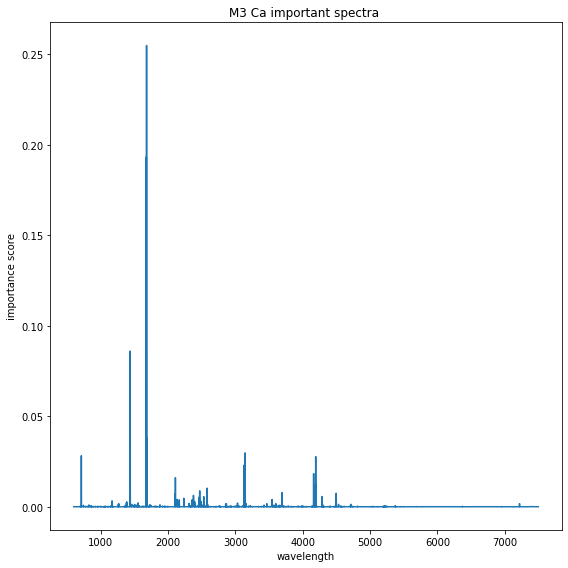

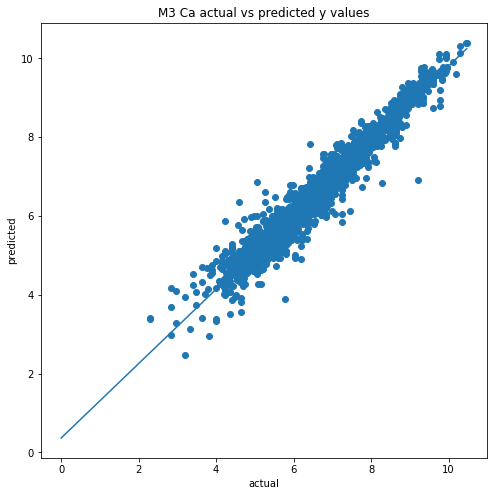

Training model for M3 K.
4493 samples available.


In [ ]:
%%time
models = []
for target in columns:
    #set the target value of interest
    Y_COLUMN = target
    
    #initialize the vanilla xgboost model
    model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])
    
    #fit and predict it for the target variable
    model.fit(X_train, y_train[Y_COLUMN])
    yhat = model.predict(X_validate)
    
    #evaluate results with root mean square error percentage
    rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
    _mean = y[Y_COLUMN].mean()
    rmsep = rmse / _mean
    print(f'{Y_COLUMN} RMSE percentage = {rmsep}')
    
    #plot the feature importance
    feature_importance = model.feature_importances_
    
    fig, ax = plt.subplots(figsize=(8,8))
    plt.plot(column_vals, feature_importance)
    #plt.xticks(feature_importance, , rotation='vertical')
    plt.xlabel('wavelength')
    plt.ylabel('importance score')
    plt.title(f'{Y_COLUMN} important spectra ')
    plt.tight_layout()
    plt.show()
    
    #plot the predicted to true
    fig, ax = plt.subplots(figsize=(8,8))
    plt.scatter(y_test[Y_COLUMN], yhat)
    plt.title(f'{Y_COLUMN} actual vs predicted y values')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    
    #plot reg line
    plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
    plt.show()
    

In [24]:
columns = elements[2:4]
columns

['M3 K', 'M3 Mg']

In [26]:
elements[4:6]

['M3 P', 'PH']

Training model for M3 K.
4493 samples available.
CV r^2 score: 0.831
M3 K RMSE percentage = 0.08402008631230885


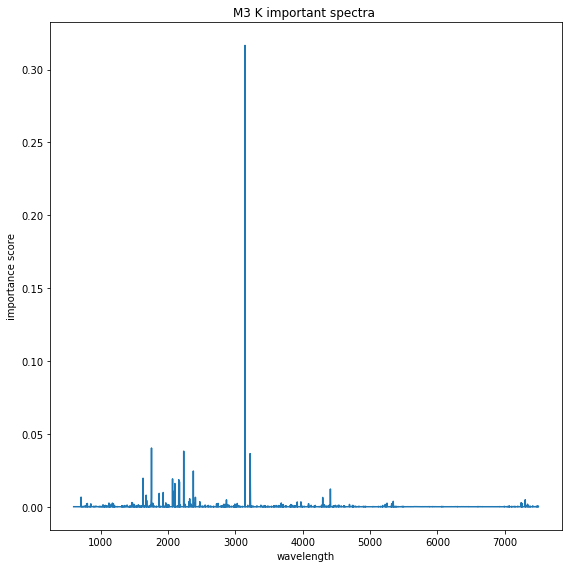

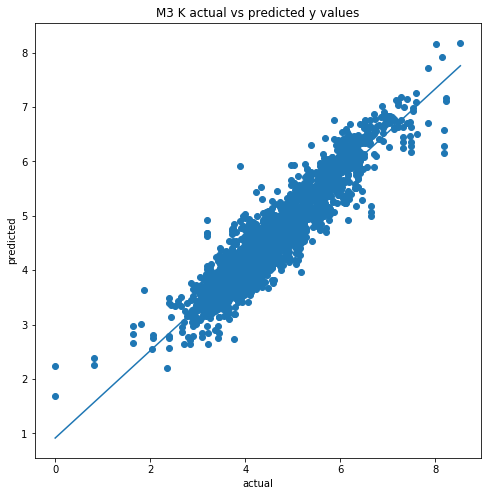

CPU times: user 43min 7s, sys: 8.57 s, total: 43min 16s
Wall time: 42min 19s


In [27]:
%%time

#set the target value of interest
Y_COLUMN = 'M3 K'

#initialize the vanilla xgboost model
model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])

#fit and predict it for the target variable
model.fit(X_train, y_train[Y_COLUMN])
yhat = model.predict(X_validate)


#evaluate results with root mean square error percentage
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
_mean = y[Y_COLUMN].mean()
rmsep = rmse / _mean
print(f'{Y_COLUMN} RMSE percentage = {rmsep}')

#plot the feature importance
feature_importance = model.feature_importances_

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(column_vals, feature_importance)
#plt.xticks(feature_importance, , rotation='vertical')
plt.xlabel('wavelength')
plt.ylabel('importance score')
plt.title(f'{Y_COLUMN} important spectra ')
plt.tight_layout()
plt.show()

#plot the predicted to true
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(y_test[Y_COLUMN], yhat)
plt.title(f'{Y_COLUMN} actual vs predicted y values')
plt.xlabel('actual')
plt.ylabel('predicted')

#plot reg line
plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
plt.show()

Training model for PH.
4493 samples available.
CV r^2 score: 0.910
PH RMSE percentage = 0.02227321885958608


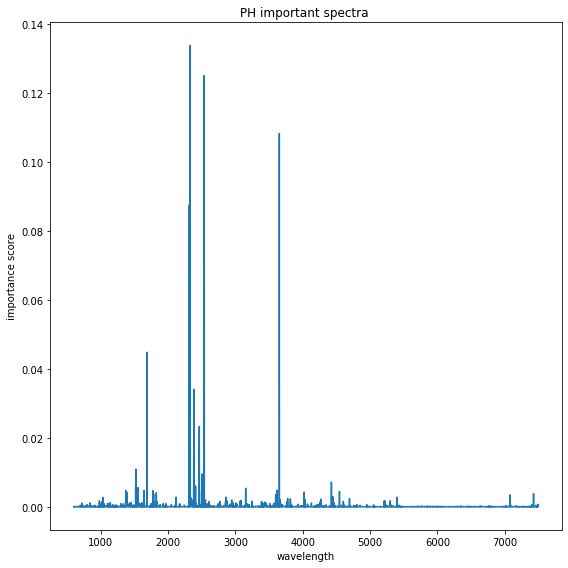

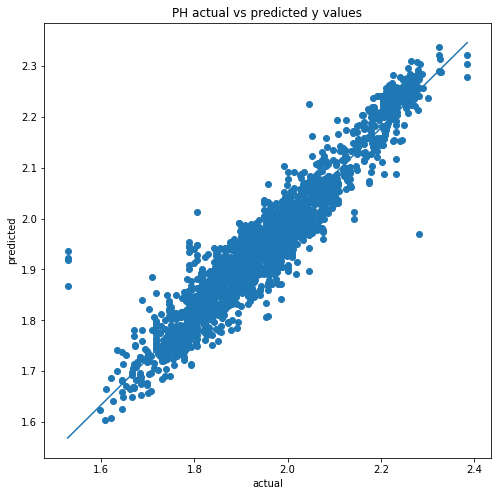

CPU times: user 33min 28s, sys: 6.5 s, total: 33min 35s
Wall time: 32min 36s


In [17]:
%%time

#set the target value of interest
Y_COLUMN = 'PH'

#initialize the vanilla xgboost model
model, r_squared = basic_xgboost3(X_train, y_train[Y_COLUMN])

#fit and predict it for the target variable
model.fit(X_train, y_train[Y_COLUMN])
yhat = model.predict(X_validate)


#evaluate results with root mean square error percentage
rmse = np.sqrt(mean_squared_error(y_test[Y_COLUMN], yhat))
_mean = y[Y_COLUMN].mean()
rmsep = rmse / _mean
print(f'{Y_COLUMN} RMSE percentage = {rmsep}')

#plot the feature importance
feature_importance = model.feature_importances_

fig, ax = plt.subplots(figsize=(8,8))
plt.plot(column_vals, feature_importance)
#plt.xticks(feature_importance, , rotation='vertical')
plt.xlabel('wavelength')
plt.ylabel('importance score')
plt.title(f'{Y_COLUMN} important spectra ')
plt.tight_layout()
plt.show()

#plot the predicted to true
fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(y_test[Y_COLUMN], yhat)
plt.title(f'{Y_COLUMN} actual vs predicted y values')
plt.xlabel('actual')
plt.ylabel('predicted')

#plot reg line
plt.plot(np.unique(y[Y_COLUMN]), np.poly1d(np.polyfit(y_test[Y_COLUMN], yhat, 1))(np.unique(y[Y_COLUMN])))
plt.show()